## EDA Médicos Classificados por Tipo em SP 2024

  Este projeto Análise Exploratória de Dados (EDA) tem como objetivo analisar o número e o tipo de médicos nos municípios do estado de São Paulo, segmentando-os entre o sistema de saúde SUS e o setor Não-SUS. O objetivo principal é extrair insights sobre a distribuição de profissionais de saúde no estado.

  Os dados utilizados são do ano de 2024 e foram obtidos no repositório oficial do SEADE (Sistema Estadual de Análise de Dados) e podem ser acessados através deste link: https://repositorio.seade.gov.br/dataset/saude-painel/resource/2566651a-39dc-47df-a2e2-6c7060dc3fd5.

  Os códigos de municípios utilizados na análise seguem o padrão oficial do IBGE – Códigos de Municípios, conforme documentação disponível em: https://www.ibge.gov.br/explica/codigos-dos-municipios.php#SP.

  A análise exploratória de dados foi conduzida em etapas, seguindo um fluxo de trabalho padrão para garantir a qualidade e a integridade da análise.

#### Perguntas de Análise

  Com base no conjunto de dados, as seguintes perguntas guiarão a análise exploratória:
- 1) Quais são as especialidades médicas mais frequentes no SUS e no setor Não-SUS?
- 2) Quais municípios apresentam a maior diversidade de especialidades médicas em cada setor (SUS e Não-SUS)?
- 3) Quais são os 10 municípios com o maior número total de médicos (considerando SUS e Não-SUS)?



#### 1. Configuração e Importação de Dados
Nesta seção, importamos as bibliotecas necessárias para a análise de dados e carregamos o dataset no ambiente de trabalho.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
medicos = pd.read_csv("medicos_tipos.csv", sep=";", encoding="latin1")

#### 2) Compreensão das variáveis 
 
Antes de iniciar a exploração, realizamos uma análise inicial para entender a estrutura dos dados, identificar possíveis problemas e prepará-los para a análise.

In [4]:
medicos.shape # número de linhas x número de colunas

(6953, 5)

In [5]:
medicos.columns # nome das colunas

Index(['cod_mun', 'tipo', 'total', 'sus', 'naosus'], dtype='object')

In [6]:
medicos.head() # 5 primeiras linhas do dataset

,cod_mun,tipo,total,sus,naosus
0,3500105,15,1,1.0,0
1,3500105,20,7,6.0,1
2,3500105,3,106,99.0,7
3,3500105,6,4,4.0,0
4,3500105,30,7,3.0,4


In [7]:
medicos.info() # tipos de colunas e valores não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953 entries, 0 to 6952
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cod_mun  6953 non-null   int64  
 1   tipo     6953 non-null   int64  
 2   total    6953 non-null   int64  
 3   sus      5792 non-null   float64
 4   naosus   6953 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 271.7 KB


In [8]:
medicos.describe() # informações estatísticas 

,cod_mun,tipo,total,sus,naosus
count,6.953000e+03,6953.000000,6953.000000,5792.000000,6953.000000
mean,3.526695e+06,26.301021,22.307925,17.271581,7.920322
std,1.696504e+04,21.515178,209.506655,153.911574,78.985745
min,3.500105e+06,1.000000,1.000000,1.000000,0.000000
25%,3.511102e+06,6.000000,1.000000,1.000000,0.000000
50%,3.524808e+06,20.000000,3.000000,2.000000,1.000000
75%,3.541703e+06,48.000000,9.000000,7.000000,3.000000
max,3.557303e+06,66.000000,12214.000000,7446.000000,4768.000000


#### 3) Limpeza e tratamento dos dados
##### A etapa de limpeza e tratamento de dados é crucial para verificar valores duplicados, nulos e entender a natureza deles.

In [9]:
medicos.duplicated().sum() # verificando valores duplicados

0

In [10]:
medicos.isnull().sum() # verificando valores nulos

cod_mun       0
tipo          0
total         0
sus        1161
naosus        0
dtype: int64

In [11]:
medicos[medicos['sus'].isnull()][['total', 'naosus']].describe() # verificando se o total está preenchido nos nulos de sus

,total,naosus
count,1161.000000,1161.000000
mean,1.925926,1.925926
std,2.068155,2.068155
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,35.000000,35.000000


In [13]:
medicos['sus'] = medicos['sus'].fillna(0) # preenchendo os valores nulos na coluna sus com zero

#### 4) Exploração dos dados

Com os dados limpos, a próxima etapa foi explorar o conjunto de dados para responder às perguntas iniciais do projeto.

O dataset original fornecia apenas códigos numéricos para as especialidades (tipo), o que dificultava a interpretação direta. Para resolver essa questão, criamos um dicionário de mapeamento usando como referência o dicionário de dados oficial, disponibilizado pelo SEADE.


In [14]:
# criando dicionário para mapear as especialidades (tipo)
mapa_especialidades = {
    1: "Anestesiologista",
    2: "Cirurgia Geral",
    3: "Clínico",
    4: "Generalista Alopata",
    5: "Ginecologia Obstetra",
    6: "Saúde da Família",
    7: "Família e comunidade",
    8: "Pediatria",
    9: "Psiquiatria",
    10: "Radiologia e diagnóstico por imagem",
    11: "Sanitarista",
    12: "Acupuntura",
    13: "Alergista e imunologista",
    14: "Anatomopatologista",
    15: "Angiologia",
    16: "Broncoesofalogia",
    17: "Cardiologia Intervencionista",
    18: "Cancerologia cirúrgica",
    19: "Cancerologia pediátrica",
    20: "Cardiologia",
    21: "Cirurgia cardiovascular",
    22: "Cirurgia da mão",
    23: "Cirurgia de cabeça e pescoço",
    24: "Cirurgia do aparelho digestivo",
    25: "Cirurgia pediátrica",
    26: "Cirurgia plástica",
    27: "Cirurgia torácica",
    28: "Citopatologia",
    29: "Coloproctologia",
    30: "Dermatologia",
    31: "Do trabalho",
    32: "Cirurgia vascular",
    33: "Endoscopia",
    34: "Medicina de tráfego",
    35: "Medicina intensiva",
    36: "Medicina nuclear",
    37: "Medicina preventiva e social",
    38: "Endocrinologia e metabologia",
    39: "Fisiatria",
    40: "Foniatria",
    41: "Gastroenterologia",
    42: "Geneticista",
    43: "Geriatria",
    44: "Hansenologista",
    45: "Hematologia",
    46: "Hiperbarista",
    47: "Homeopatia",
    48: "Infectologia",
    49: "Legista",
    50: "Mastologia",
    51: "Nefrologia",
    52: "Neurocirurgia",
    53: "Neurofisiologia clínica",
    54: "Neurologia",
    55: "Nutrologia",
    56: "Oftalmologia",
    57: "Oncologia clínica",
    58: "Ortopedia e traumatologia",
    59: "Otorrinolaringologia",
    60: "Patologia",
    61: "Patologia clínica / medicina laboratorial",
    62: "Pneumologia",
    63: "Radioterapeuta",
    64: "Residente",
    65: "Reumatologia",
    66: "Urologia"
}

# aplicando o mapeamento
medicos['especialidade'] = medicos['tipo'].map(mapa_especialidades)

In [15]:
# especialidades ausentes no sus
ausentes_sus = medicos.groupby('especialidade')[['sus', 'naosus']].sum()
ausentes_sus = ausentes_sus[(ausentes_sus['sus'] == 0) & (ausentes_sus['naosus'] > 0)]
print(ausentes_sus)

                 sus  naosus
especialidade               
Cirurgia da mão  0.0       1


#### 4.1) Análise do número total de médicos

Identificando os dez municípios com o maior número total de médicos, combinando os profissionais do SUS e do setor Não-SUS.

In [16]:
# top 10 municípios com mais médicos no total
total_medicos_por_municipio = medicos.groupby('cod_mun')[['sus', 'naosus']].sum()
total_medicos_por_municipio['total'] = total_medicos_por_municipio['sus'] + total_medicos_por_municipio['naosus']
top_10_total_medicos = total_medicos_por_municipio['total'].nlargest(10)
print(top_10_total_medicos)

cod_mun
3550308    53817.0
3509502     7771.0
3543402     4722.0
3518800     3829.0
3547809     3517.0
3548708     2955.0
3548500     2880.0
3549805     2856.0
3552205     2673.0
3549904     2360.0
Name: total, dtype: float64


In [17]:
# criando dicionário de municípios top 10 médicos no total
dict_municipios_total = {
    3550308: "São Paulo",
    3509502: "Campinas",
    3543402: "Ribeirão Preto",
    3518800: "Guarulhos",
    3547809: "Santo André",
    3548708: "São Bernardo do Campo", 
    3548500: "Santos",
    3549805: "São José do Rio Preto",
    3525904: "Jundiaí",
    3552205: "Sorocaba",
    3549904: "São José dos Campos",

    
}
top_10_total_medicos = top_10_total_medicos.reset_index()
top_10_total_medicos['nome_municipio'] = top_10_total_medicos['cod_mun'].map(dict_municipios_total)

print(top_10_total_medicos)

   cod_mun    total         nome_municipio
0  3550308  53817.0              São Paulo
1  3509502   7771.0               Campinas
2  3543402   4722.0         Ribeirão Preto
3  3518800   3829.0              Guarulhos
4  3547809   3517.0            Santo André
5  3548708   2955.0  São Bernardo do Campo
6  3548500   2880.0                 Santos
7  3549805   2856.0  São José do Rio Preto
8  3552205   2673.0               Sorocaba
9  3549904   2360.0    São José dos Campos


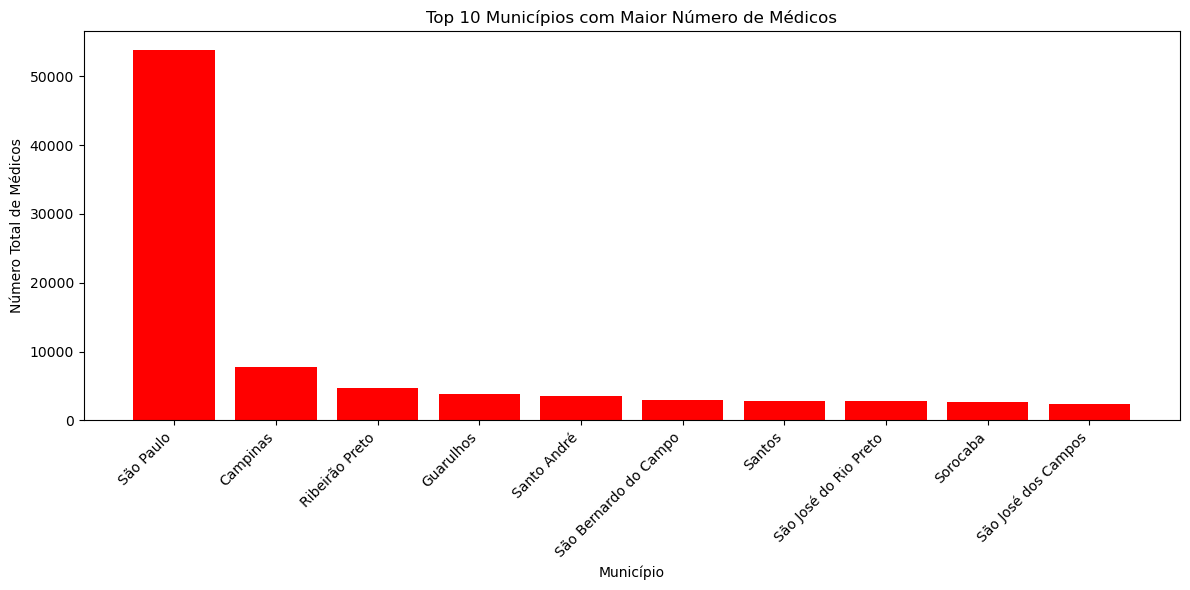

In [18]:
plt.figure(figsize=(12,6))
bars = plt.bar(top_10_total_medicos['nome_municipio'], top_10_total_medicos['total'], color='red')
plt.title('Top 10 Municípios com Maior Número de Médicos')
plt.xlabel('Município')
plt.ylabel('Número Total de Médicos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A análise inicial revelou uma grande disparidade na distribuição de médicos no estado. A cidade de São Paulo lidera com 53.817 profissionais, um número significativamente maior que os municípios em segundo e terceiro lugar, Campinas (7.771) e Ribeirão Preto (4.722), respectivamente. Isso evidencia uma forte concentração de médicos na capital em comparação com o restante do estado.

#### 4.2) Verificando as especialidades mais frequentes em cada setor

In [19]:
# verificando especialidades mais frequentes no sus
sus_top = medicos.groupby('especialidade')['sus'].sum().sort_values(ascending=False).head(10)
print(sus_top)

especialidade
Clínico                                35422.0
Residente                              15171.0
Pediatria                              10496.0
Saúde da Família                        4823.0
Ginecologia Obstetra                    3746.0
Anestesiologista                        3205.0
Cardiologia                             2899.0
Radiologia e diagnóstico por imagem     2325.0
Ortopedia e traumatologia               2198.0
Psiquiatria                             1950.0
Name: sus, dtype: float64


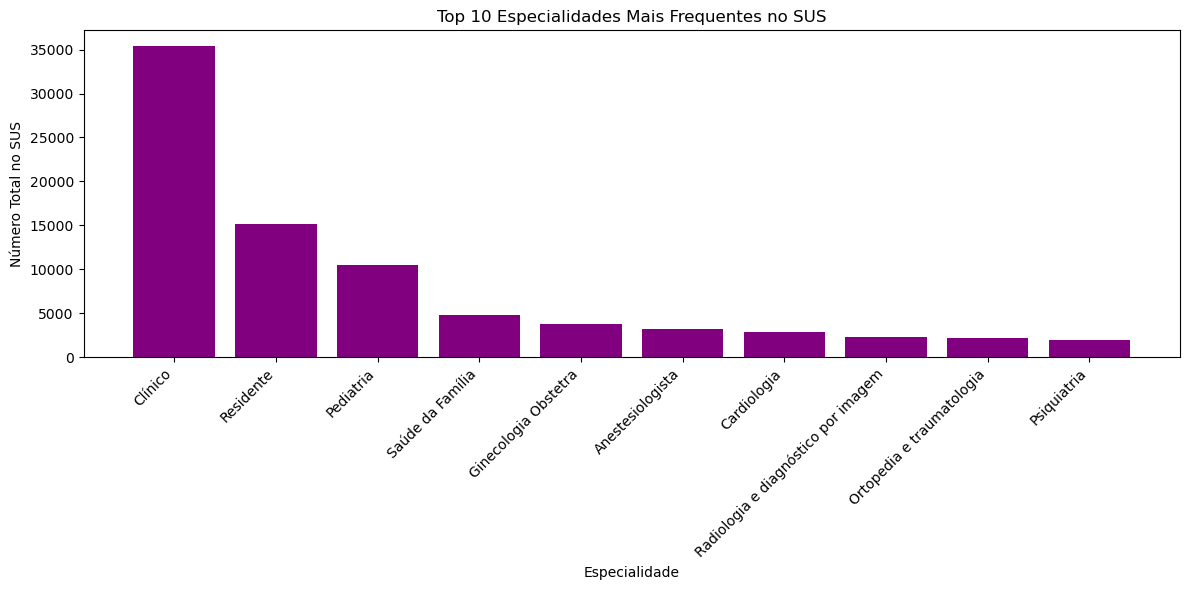

In [20]:
plt.figure(figsize=(12,6))
bars = plt.bar(sus_top.index, sus_top.values, color='purple')  # cor diferente
plt.title('Top 10 Especialidades Mais Frequentes no SUS')
plt.xlabel('Especialidade')
plt.ylabel('Número Total no SUS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# verificando especialidades mais frequentes no naosus
naosus_top = medicos.groupby('especialidade')['naosus'].sum().sort_values(ascending=False).head(10)
print(naosus_top)

especialidade
Clínico                                11641
Pediatria                               5185
Ginecologia Obstetra                    4251
Cardiologia                             3458
Oftalmologia                            2434
Ortopedia e traumatologia               2419
Dermatologia                            2379
Radiologia e diagnóstico por imagem     2209
Anestesiologista                        2100
Psiquiatria                             1723
Name: naosus, dtype: int64


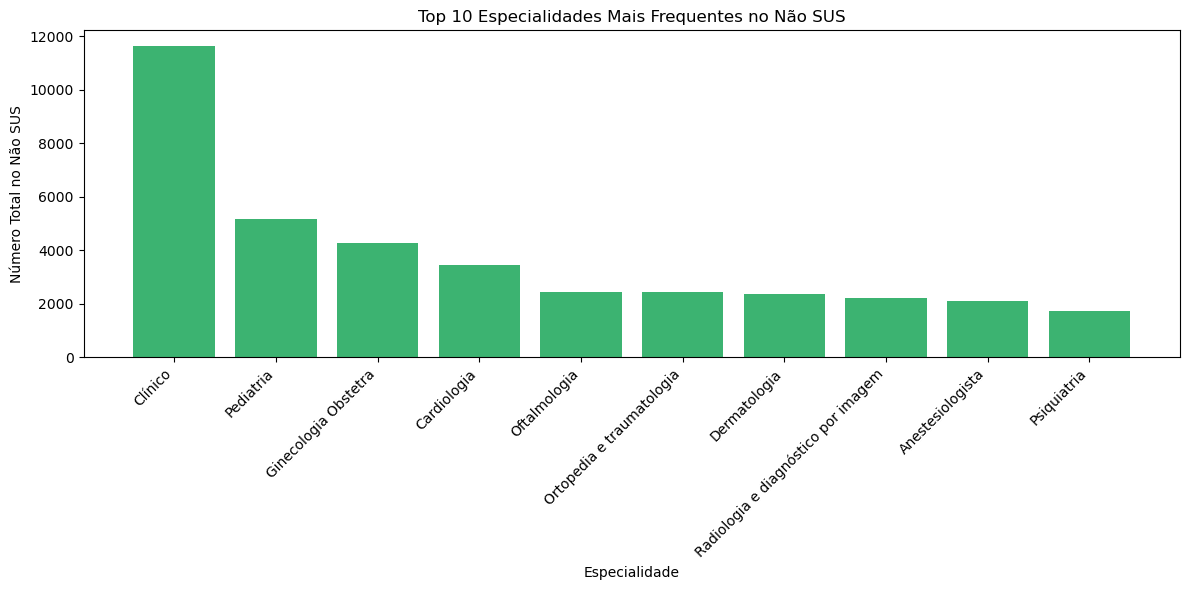

In [22]:
plt.figure(figsize=(12,6))
bars = plt.bar(naosus_top.index, naosus_top.values, color='mediumseagreen')  # verde azulado

plt.title('Top 10 Especialidades Mais Frequentes no Não SUS')
plt.xlabel('Especialidade')
plt.ylabel('Número Total no Não SUS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A distribuição de especialidades nos sistemas de saúde mostra focos distintos. No SUS, há uma priorização do atendimento primário e da formação, com as especialidades de Clínico, Residente e Saúde da Família sendo as mais comuns. Já no setor Não-SUS, embora a especialidade Clínico também lidere, o ranking destaca áreas de maior demanda no mercado privado, como Oftalmologia, Dermatologia e Cardiologia. A principal diferença é a ênfase: o SUS foca na atenção básica, enquanto o setor privado se concentra em serviços mais especializados.

#### 4.3) Análise dos municípios com maior diversidade de especialidades

In [23]:
# diversidade de especilidades por município sus 
diversidade_sus = medicos[medicos['sus'] > 0].groupby('cod_mun')['especialidade'].nunique()
top_10_municipios_sus = diversidade_sus.nlargest(10)
print(top_10_municipios_sus)

cod_mun
3550308    61
3509502    56
3547809    54
3543402    53
3548500    53
3549805    53
3549904    47
3507506    46
3505500    45
3506003    45
Name: especialidade, dtype: int64


In [24]:
# Criando dicionário de municípios top 10 SUS
dict_municipios = {
    3550308: "São Paulo",
    3509502: "Campinas",
    3547809: "Santo André",
    3543402: "Ribeirão Preto",
    3548500: "Santos",
    3549805: "São José do Rio Preto",
    3549904: "São José dos Campos",
    3507506: "Botucatu",
    3505500: "Barretos",
    3506003: "Bauru"
}

top_10_municipios_sus = top_10_municipios_sus.reset_index()  # isto transforma o índice (cod_mun) em coluna
top_10_municipios_sus['nome_municipio'] = top_10_municipios_sus['cod_mun'].map(dict_municipios)


# Exibindo o resultado
print(top_10_municipios_sus)

   cod_mun  especialidade         nome_municipio
0  3550308             61              São Paulo
1  3509502             56               Campinas
2  3547809             54            Santo André
3  3543402             53         Ribeirão Preto
4  3548500             53                 Santos
5  3549805             53  São José do Rio Preto
6  3549904             47    São José dos Campos
7  3507506             46               Botucatu
8  3505500             45               Barretos
9  3506003             45                  Bauru


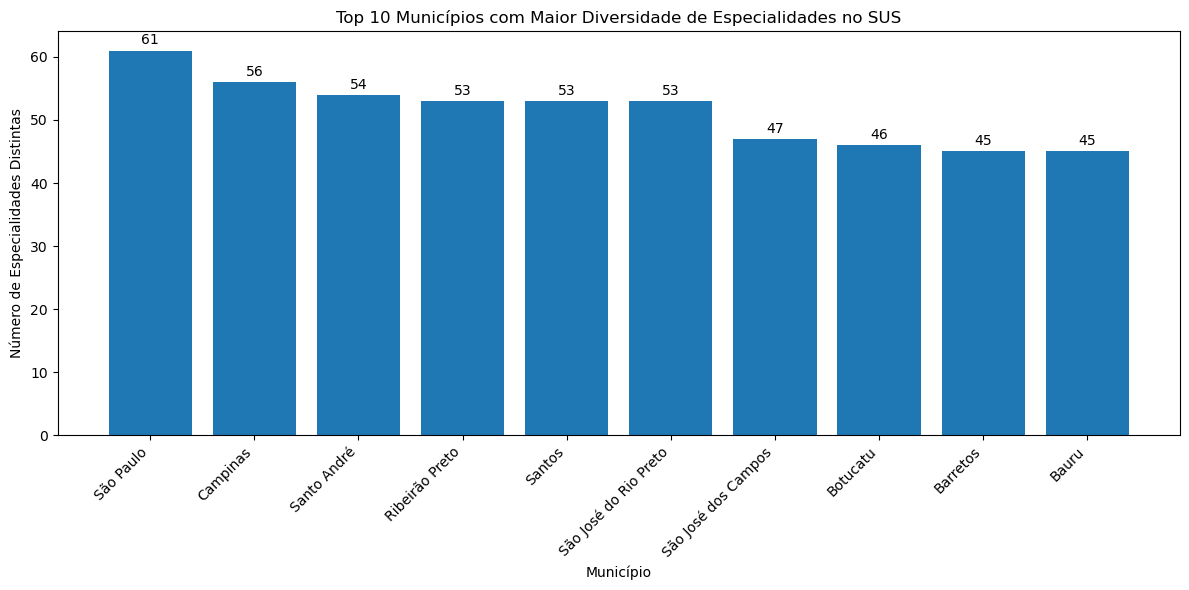

In [25]:
# plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_10_municipios_sus['nome_municipio'], top_10_municipios_sus['especialidade'])

# títulos e rótulos
plt.title('Top 10 Municípios com Maior Diversidade de Especialidades no SUS')
plt.xlabel('Município')
plt.ylabel('Número de Especialidades Distintas')
plt.xticks(rotation=45, ha='right')

# adicionar valores nas barras
for i, row in top_10_municipios_sus.iterrows():
    plt.text(i, row['especialidade'] + 0.5, str(row['especialidade']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [26]:
# diversidade de especilidades por município naosus 
diversidade_naosus = medicos[medicos['naosus'] > 0].groupby('cod_mun')['especialidade'].nunique()
top_10_municipios_nao_sus = diversidade_naosus.nlargest(10)
print(top_10_municipios_nao_sus)

cod_mun
3550308    62
3509502    56
3543402    50
3547809    49
3525904    48
3548500    48
3549805    48
3549904    48
3534401    47
3518800    45
Name: especialidade, dtype: int64


In [27]:
top_10_municipios_nao_sus = top_10_municipios_nao_sus.reset_index() # transformando series em dataframe e resetar índice

In [28]:
#_nao_sus = top_ criando dicionário de municípios top 10 Não SUS
dict_municipios_nao_sus = {
    3550308: "São Paulo",
    3509502: "Campinas",
    3543402: "Ribeirão Preto",
    3547809: "Santo André",
    3525904: "Jundiaí",
    3548500: "Santos",
    3549805: "São José do Rio Preto",
    3549904: "São José dos Campos",
    3534401: "Osasco",
    3518800: "Guarulhos"
}
top_10_municipios_nao_sus['nome_municipio'] = top_10_municipios_nao_sus['cod_mun'].map(dict_municipios_nao_sus)

print(top_10_municipios_nao_sus)

   cod_mun  especialidade         nome_municipio
0  3550308             62              São Paulo
1  3509502             56               Campinas
2  3543402             50         Ribeirão Preto
3  3547809             49            Santo André
4  3525904             48                Jundiaí
5  3548500             48                 Santos
6  3549805             48  São José do Rio Preto
7  3549904             48    São José dos Campos
8  3534401             47                 Osasco
9  3518800             45              Guarulhos


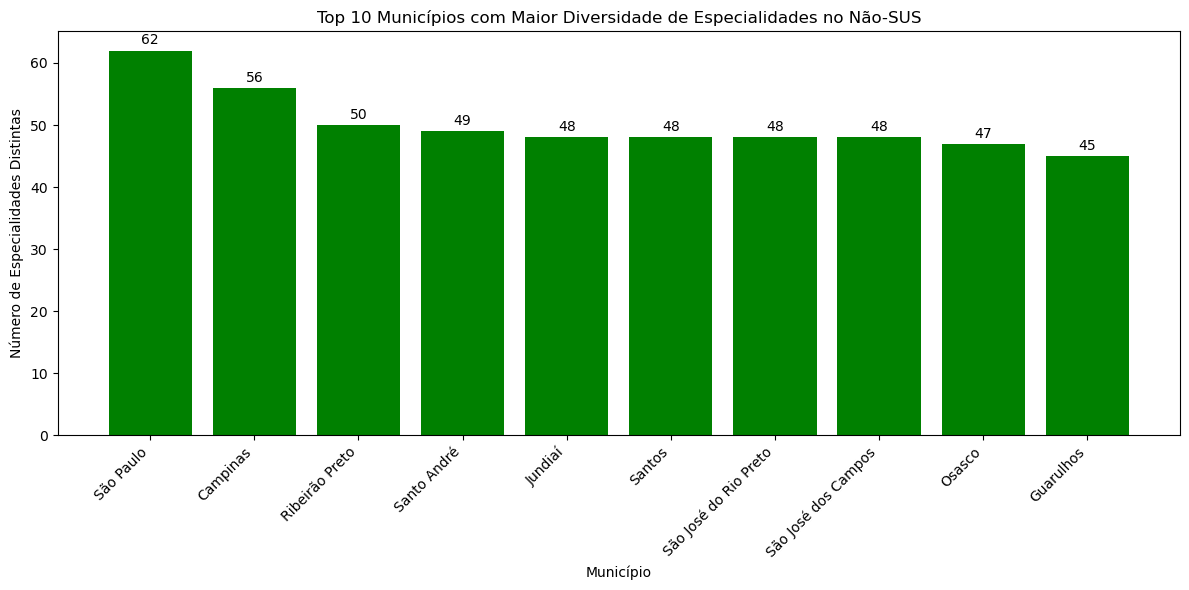

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_municipios_nao_sus['nome_municipio'], top_10_municipios_nao_sus['especialidade'], color='green')

plt.title('Top 10 Municípios com Maior Diversidade de Especialidades no Não-SUS')
plt.xlabel('Município')
plt.ylabel('Número de Especialidades Distintas')
plt.xticks(rotation=45, ha='right')

for i, row in top_10_municipios_nao_sus.reset_index().iterrows():
    plt.text(i, row['especialidade'] + 0.5, str(row['especialidade']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

  A análise da diversidade de especialidades médicas revelou que, no SUS, a oferta de serviços é robusta e concentrada em polos regionais já consolidados, como Campinas, Ribeirão Preto e Santos. No setor Não-SUS, o padrão é similar, com a capital e Campinas na liderança. No entanto, a oferta privada se expande para municípios da região metropolitana e outros polos econômicos, como Jundiaí, Osasco e Guarulhos. Em resumo, o SUS se apoia em centros regionais, enquanto o setor Não-SUS acompanha de perto a densidade populacional para expandir seus serviços.

#### 5) Conclusão e Discussão

    A análise exploratória de dados revelou padrões importantes sobre a distribuição de médicos e especialidades no estado de São Paulo, destacando a dualidade entre os sistemas SUS e Não-SUS.

    Principais Conclusões:

Há uma forte concentração geográfica de médicos e de diversidade de especialidades nos grandes centros, com a cidade de São Paulo liderando de forma isolada em ambos os setores.

O SUS prioriza a atenção primária, com foco em especialidades como Clínico, Residente e Saúde da Família.

O setor Não-SUS demonstra uma oferta mais ampla em especialidades de alta demanda privada, como Oftalmologia e Dermatologia.

Enquanto a oferta do SUS se consolida em polos regionais estratégicos, o setor Não-SUS se expande para cidades da região metropolitana e outros polos econômicos.

    Em resumo, a distribuição de profissionais de saúde no estado é desigual, refletindo os diferentes objetivos de cada sistema e sendo influenciada por fatores geográficos e de mercado.
    